<a href="https://colab.research.google.com/github/neto-riga/metodos_numericos_2/blob/main/4_M%C3%A9todo_de_Broyden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Regresar al ínidce](https://github.com/neto-riga/metodos_numericos_2/blob/main/portafolio.md#índice)

#Método de Bryden
---

Sea el siguiente sistema de ecuaciones:
$$
\begin{eqnarray}
f_{1}(x,y,z)&=&x^2 - x +2y^2 + yz-10=0\\
f_{2}(x,y,z)&=&5x-6y+z=0 \\ 
f_{3}(x,y,z)&=&z-x^2-y^2=0
\end{eqnarray}
$$

* Elaborar la gráfica.
* Elegir valores iniciales.
* Obtener dos raíces con una tolerancia de $|F(x^{k})|<0.00005$.
* Presentar los cálculos de forma breve y clara. 
* Indicar claramente la solución.
* Elaborar concluciones. 


Graficamos:

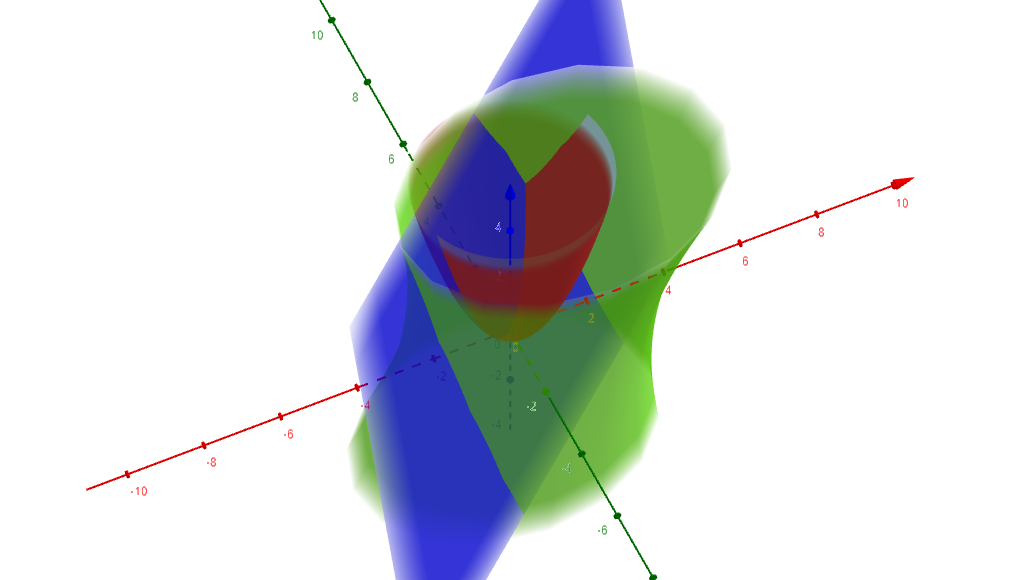

In [ ]:
import numpy as np
import pandas as pd

Definimos las funciones

In [ ]:
F=[lambda x,y,z: x**2 - x + 2*(y**2) + y*z - 10,
   lambda x,y,z: 5*x - 6*y + z,
   lambda x,y,z: z - x**2 - y**2]

Definimos la matriz Jacobiana:

$$
\begin{bmatrix}
2x-1&4y+z&y\\
5&-6&1\\
-2x&-2y&1
\end{bmatrix}
$$

Para nuestro punto inicial: 
$$
X = \begin{bmatrix}
1.05\\
1.4\\
3.4
\end{bmatrix}
$$


In [ ]:
# La Jaobiana 
jac = np.array([lambda x, y, z: 2 * x - 1,
                lambda x, y, z: 4 * y + z,
                lambda x, y, z: y,
                lambda x, y, z: 5,
                lambda x, y, z: -6,
                lambda x, y, z: 1,
                lambda x, y, z: -2 * x,
                lambda x, y, z: -2 * y,
                lambda x, y, z: 1])

# Para el vector inicial obtenemos
x0 = np.array([1, 1.4, 3.4]).reshape(3,1)
j0 = np.zeros(9)
for i, func in enumerate(jac):
  j0[i] = func(*x0)

J = j0.reshape(3,3).copy()
J

array([[ 1. ,  9. ,  1.4],
       [ 5. , -6. ,  1. ],
       [-2. , -2.8,  1. ]])

In [ ]:
Error = np.zeros((3,1))
Error_abs=[1]
i=0
x=np.zeros((3,1))
x[0] =1
x[1]=1.4
x[2]=3.4
Fx=np.zeros((3,1))
Fx2=np.zeros((3,1))
Jin=np.linalg.inv(J)
Fx[0]=F[0](*x)
Fx[1]=F[1](*x)
Fx[2]=F[2](*x)
sol=np.zeros((3,1))
sol=x - np.dot(np.linalg.inv(J),Fx)
Ain = np.zeros((3,3))
columnas = ['x', 'y', 'z','Error']
df=pd.DataFrame(columns=columnas)
while Error_abs[i] > 0.00005:
    delX = sol-x 
    Fx[0] = F[0](*x)
    Fx[1]=F[1](*x)
    Fx[2]=F[2](*x)
    Fx2[0] = F[0](*sol)
    Fx2[1] = F[1](*sol)
    Fx2[2]=F[2](*sol)
    delF = Fx2 - Fx 
    po=delX - np.dot(Jin,delF)
    pa=np.dot(np.transpose(delX),Jin)
    pe = np.dot(pa,delF)
    Ain = Jin + ((np.dot(po,pa))/(np.dot(pa,delF)))
    x=sol 
    sol=x- np.dot(Ain,Fx2)
    Jin=Ain
    Error_abs.append(np.amax(abs(Fx)))
    Fila=[]
    for j in range(3):
      Fila.append(np.round(x[j],8))
    Error_abs[0]=np.nan
    Fila.append(np.round(Error_abs[i],8))
    df.loc[i]=Fila
    i+=1

Error_abs[0]=np.nan
Fila=[]
for j in range(3):
  Fila.append(np.round(x[j],8))
Fila.append(np.round(Error_abs[-1],8))
df.loc[i]=Fila
df

,x,y,z,Error
0,[1.11578947],[1.51578947],[3.51578947],NaN
1,[1.10977219],[1.51073293],[3.51553665],1.320000
2,[1.11010108],[1.51097967],[3.51537262],0.053629
3,[1.11009922],[1.51097908],[3.51537842],0.002513
4,[1.11009922],[1.51097908],[3.51537842],0.000011


# Para el segundo punto

In [ ]:
x0 = np.array([-3.9, -0.5, 15.5]).reshape(3,1)
j0 = np.zeros(9)
for i, func in enumerate(jac):
  j0[i] = func(*x0)

J = j0.reshape(3,3).copy()
J

array([[-8.8, 13.5, -0.5],
       [ 5. , -6. ,  1. ],
       [ 7.8,  1. ,  1. ]])

In [ ]:
Error = np.zeros((3,1))
Error_abs=[1]
i=0
x=np.zeros((3,1))
x[0] = -3.9
x[1] = -0.5
x[2] = 15.5
Fx=np.zeros((3,1))
Fx2=np.zeros((3,1))
Jin=np.linalg.inv(J)
Fx[0]=F[0](*x)
Fx[1]=F[1](*x)
Fx[2]=F[2](*x)
sol=np.zeros((3,1))
sol=x - np.dot(np.linalg.inv(J),Fx)
Ain = np.zeros((3,3))
columnas = ['x', 'y', 'z','Error']
df=pd.DataFrame(columns=columnas)
while Error_abs[i] > 0.00005:
    delX = sol-x 
    Fx[0] = F[0](*x)
    Fx[1]=F[1](*x)
    Fx[2]=F[2](*x)
    Fx2[0] = F[0](*sol)
    Fx2[1] = F[1](*sol)
    Fx2[2]=F[2](*sol)
    delF = Fx2 - Fx 
    po=delX - np.dot(Jin,delF)
    pa=np.dot(np.transpose(delX),Jin)
    pe = np.dot(pa,delF)
    Ain = Jin + ((np.dot(po,pa))/(np.dot(pa,delF)))
    x=sol 
    sol=x- np.dot(Ain,Fx2)
    Jin=Ain
    Error_abs.append(np.amax(abs(Fx)))
    Fila=[]
    for j in range(3):
      Fila.append(np.round(x[j],8))
    Error_abs[0]=np.nan
    Fila.append(np.round(Error_abs[i],8))
    df.loc[i]=Fila
    i+=1

Error_abs[0]=np.nan
Fila=[]
for j in range(3):
  Fila.append(np.round(x[j],8))
Fila.append(np.round(Error_abs[-1],8))
df.loc[i]=Fila
df

,x,y,z,Error
0,[-3.91904762],[-0.64095238],[15.74952381],NaN
1,[-3.91577396],[-0.63944546],[15.74219705],1.860000
2,[-3.91572484],[-0.63947165],[15.74179434],0.020230
3,[-3.9157157],[-0.63947085],[15.74175338],0.000564
4,[-3.9157157],[-0.63947085],[15.74175338],0.000043


## Resultados

Para el primer punto obtuvimos en 4 iteraciones el punto (1.110099, 1.510979, 3.515378) con un error de 1e$^{-6}$.

El segundo punto también fue encontrado en 4 iteraciones, obteniendo el punto (-3.915716, -0.639470, 15.741753) con un error de 43e$^{-6}$.

## [Regresar al ínidce](https://github.com/neto-riga/metodos_numericos_2/blob/main/portafolio.md#índice)